In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

file_path_1 = '/content/drive/My Drive/nlp/drugsComTest_raw.csv'
file_path_2 = '/content/drive/My Drive/nlp/drugsComTrain_raw.csv'

test_df = pd.read_csv(file_path_1)
train_df = pd.read_csv(file_path_2)

print(test_df.head())
print(train_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   uniqueID         drugName                     condition  \
0    163740      Mirtazapine                    Depression   
1    206473       Mesalamine  Crohn's Disease, Maintenance   
2    159672          Bactrim       Urinary Tract Infection   
3     39293         Contrave                   Weight Loss   
4     97768  Cyclafem 1 / 35                 Birth Control   

                                              review  rating       date  \
0  "I&#039;ve tried a few antidepressants over th...      10  28-Feb-12   
1  "My son has Crohn&#039;s disease and has done ...       8  17-May-09   
2                      "Quick reduction of symptoms"       9  29-Sep-17   
3  "Contrave combines drugs that were used for al...       9   5-Mar-17   
4  "I have been on this birth control for one cyc...       9  22-Oct-15   

   usefulCount  
0           22  
1           1

In [ ]:
final_data = pd.concat([train_df, test_df], ignore_index=True)

print(f"Merged dataset size: {final_data.shape}")

Merged dataset size: (215063, 7)


In [ ]:

scraped_data = pd.read_csv('/content/drive/My Drive/nlp/drug_reviews.csv')

In [ ]:
print(final_data.columns)  # Columns from Drugs.com data
print(scraped_data.columns)   # Columns from our web-scraped data

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')
Index(['drug_name', 'date', 'condition', 'rating_overall', 'text'], dtype='object')


In [ ]:
df1 = final_data.rename(columns={'drugName':'drug_name'})

In [ ]:
df1.head()

,uniqueID,drug_name,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [ ]:
df1.drop(columns=['usefulCount','uniqueID'], inplace=True)

In [ ]:
df2 = scraped_data.rename(columns={'text': 'review', 'rating_overall': 'rating'})

In [ ]:
df2.head()

,drug_name,date,condition,rating,review
0,Sumatriptan,10/11/2024,Condition: Migraine Headache,Overall rating 2.0,I don't have a choice of brand on the NHS and ...
1,Sumatriptan,9/27/2024,Condition: Migraine Headache,Overall rating 1.0,"I take a lot of Sumatriptan, usually from Auro..."
2,Sumatriptan,2/21/2024,Condition: Migraine Headache,Overall rating 5.0,I have used Dr. Reddy Sumatriptan for Migraine...
3,Sumatriptan,1/8/2024,Condition: Migraine Headache,Overall rating 4.0,Dr reddys brand worked with just 1 pill. Then ...
4,Sumatriptan,8/30/2023,Condition: Migraine Headache,Overall rating 5.0,I started taking sumatriptan when I was probab...


In [ ]:
# Now, merging the datasets based on similar structure
df = pd.concat([df1, df2], ignore_index=True)

print(f"Final merged corpus size: {df.shape}")


Final merged corpus size: (216663, 5)


In [ ]:
df.head(20)

,drug_name,condition,review,rating,date
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16
5,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15
8,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16


In [ ]:

df.isnull().sum()

,0
drug_name,0
condition,1194
review,0
rating,0
date,0


In [ ]:

df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
drug_name,0
condition,0
review,0
rating,0
date,0


In [ ]:
df.shape

(215469, 5)

In [ ]:
df=df.sample(n=5000, random_state=42)

In [ ]:
df.shape

(5000, 5)

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [ ]:
df['review'] = df['review'].apply(lambda x: re.sub(r'&#039;|<.*?>', "'", str(x)))
df['date'] = pd.to_datetime(df['date'], errors='coerce')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

<ipython-input-19-4ea26377af1d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [ ]:
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    return " ".join(tokens)

df['cleaned_review'] = df['review'].apply(preprocess)

In [ ]:
print(df.head())

           drug_name                                    condition  \
127180      Adderall  29</span> users found this comment helpful.   
163032      Zolpidem                                     Insomnia   
22136         Asacol              Ulcerative Colitis, Maintenance   
50091   Etonogestrel                                Birth Control   
180826  Depo-Provera                    Abnormal Uterine Bleeding   

                                                   review rating       date  \
127180  "I have been on Adderall, 10mg twice per day, ...      9 2010-04-07   
163032  "Have been taking Ambien as needed for about a...      9 2013-03-13   
22136   "I have had Ulcerative Colitis for 13 years. A...      8 2008-07-31   
50091   "I've had the nexplanon implant for just under...      7 2017-04-17   
180826  "I have been bleeding for 5 months now. I only...      1 2016-02-03   

                                           cleaned_review  
127180  adderall 10mg twice per day 2 month 32 yea

Labelling Sentiments

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sia = SentimentIntensityAnalyzer()

# Function to classify sentiment
def classify_sentiment(review):
    score = sia.polarity_scores(review)
    compound = score['compound']

    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to classify sentiments
df['sentiment'] = df['cleaned_review'].apply(classify_sentiment)

print(df['sentiment'].value_counts())

sentiment
positive    2392
negative    2362
neutral      246
Name: count, dtype: int64


In [ ]:
df.head()

,drug_name,condition,review,rating,date,cleaned_review,sentiment
127180,Adderall,29</span> users found this comment helpful.,"""I have been on Adderall, 10mg twice per day, ...",9,2010-04-07,adderall 10mg twice per day 2 month 32 year ol...,negative
163032,Zolpidem,Insomnia,"""Have been taking Ambien as needed for about a...",9,2013-03-13,taking ambien needed month worked almost flawl...,positive
22136,Asacol,"Ulcerative Colitis, Maintenance","""I have had Ulcerative Colitis for 13 years. A...",8,2008-07-31,ulcerative colitis 13 year asacol good mainten...,positive
50091,Etonogestrel,Birth Control,"""I've had the nexplanon implant for just under...",7,2017-04-17,nexplanon implant three month beginning unplea...,positive
180826,Depo-Provera,Abnormal Uterine Bleeding,"""I have been bleeding for 5 months now. I only...",1,2016-02-03,bleeding 5 month got one shot ever since get s...,negative


In [ ]:
pip install scikit-learn transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 131.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [ ]:
X = df['cleaned_review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
param_grid = {
    'C': [0.1, 1],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf']
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, verbose=1, random_state=42)
random_search.fit(X_train_vec, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.1, 1],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'rbf']},
                   random_state=42, verbose=1)

In [ ]:
print("Best parameters from Randomized Search:", random_search.best_params_)
svm_best = random_search.best_estimator_

Best parameters from Randomized Search: {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}


In [ ]:
# Train SVM with the best parameters
svm_best = random_search.best_estimator_
svm_best.fit(X_train_vec, y_train)

# Evaluate the best model
y_pred_svm = svm_best.predict(X_test_vec)
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

    negative       0.84      0.76      0.80       497
     neutral       1.00      0.02      0.04        49
    positive       0.72      0.87      0.79       454

    accuracy                           0.77      1000
   macro avg       0.85      0.55      0.54      1000
weighted avg       0.79      0.77      0.75      1000



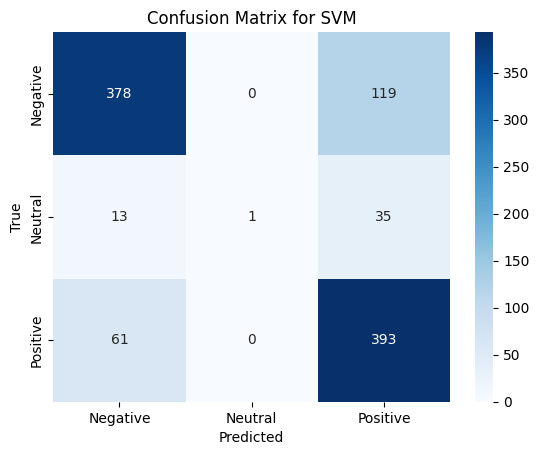

In [ ]:
# Confusion Matrix for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.savefig('/content/svm_confusion.svg', format='svg', bbox_inches='tight')

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
svm = SVC(kernel='linear', C=1)  # Choose any base SVM model
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[('svm', svm), ('log_reg', log_reg)], voting='hard')

# Fit the Voting Classifier
voting_clf.fit(X_train_vec, y_train)

# Evaluate Voting Classifier
y_pred_voting = voting_clf.predict(X_test_vec)
print("Voting Classifier Performance:")
print(classification_report(y_test, y_pred_voting))

Voting Classifier Performance:
              precision    recall  f1-score   support

    negative       0.81      0.84      0.82       497
     neutral       1.00      0.02      0.04        49
    positive       0.77      0.82      0.80       454

    accuracy                           0.79      1000
   macro avg       0.86      0.56      0.55      1000
weighted avg       0.80      0.79      0.77      1000



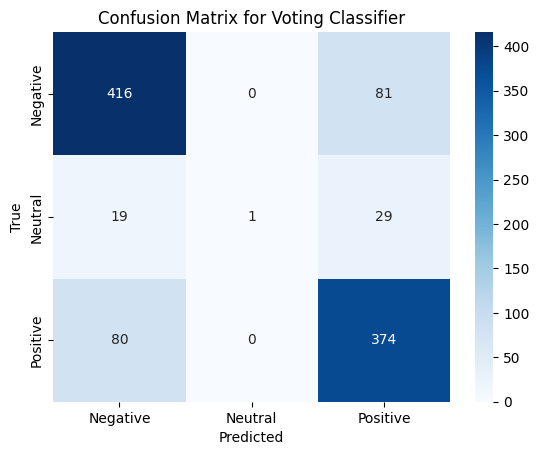

In [ ]:
cm_voting = confusion_matrix(y_test, y_pred_voting)
sns.heatmap(cm_voting, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix for Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig('/content/voting_confusion.svg', format='svg', bbox_inches='tight')
plt.show()

saving the models(SVM and VotingClassifier)

In [ ]:
import os
os.makedirs('models', exist_ok=True)

#SVM model
svm_path = 'models/svm_best_model.pkl'
joblib.dump(svm_best, svm_path)
print(f"SVM model saved to {svm_path}")

#vectorizer
vectorizer_path = 'models/tfidf_vectorizer.pkl'
joblib.dump(vectorizer, vectorizer_path)
print(f"Vectorizer saved to {vectorizer_path}")

#Voting Classifier model
voting_path = 'models/voting_classifier_model.pkl'
joblib.dump(voting_clf, voting_path)
print(f"Voting Classifier model saved to {voting_path}")


SVM model saved to models/svm_best_model.pkl
Vectorizer saved to models/tfidf_vectorizer.pkl
Voting Classifier model saved to models/voting_classifier_model.pkl


In [ ]:
from google.colab import files

# Download the models
files.download('models/svm_best_model.pkl')
files.download('models/tfidf_vectorizer.pkl')
files.download('models/voting_classifier_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

DISTILBERT

In [ ]:
pip install transformers datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 21.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Load DistilBERT tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=3)  # Adjust num_labels according to your sentiment classes

# Tokenization
def tokenize_function(examples):
    return tokenizer(examples['text'], padding='max_length', truncation=True)

# Prepare the dataset for Hugging Face
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=128)


class SentimentDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        # Convert string labels to numerical labels
        label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}  # Define your label mapping
        item['labels'] = torch.tensor(label_mapping[self.labels[idx]])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SentimentDataset(train_encodings, y_train.tolist())
test_dataset = SentimentDataset(test_encodings, y_test.tolist())

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,  # Adjust as needed
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    eval_strategy='epoch',
)

# Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=lambda p: {
        'accuracy': accuracy_score(p.label_ids, p.predictions.argmax(-1)),
        'f1': precision_recall_fscore_support(p.label_ids, p.predictions.argmax(-1), average='weighted')[2],
    }
)

# Train the model
trainer.train()

# Evaluate the model
trainer.evaluate()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.556200,0.536579,0.790000,0.768076
2,0.405500,0.428997,0.844000,0.830697
3,0.244000,0.435785,0.861000,0.854724


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'eval_loss': 0.4357854127883911,
 'eval_accuracy': 0.861,
 'eval_f1': 0.8547243871389848,
 'eval_runtime': 3.2663,
 'eval_samples_per_second': 306.154,
 'eval_steps_per_second': 4.898,
 'epoch': 3.0}

In [ ]:
# Get predictions for DistilBERT
predictions = trainer.predict(test_dataset)
y_pred_distilbert = predictions.predictions.argmax(-1)
label_mapping_inverse = {0: 'negative', 1: 'neutral', 2: 'positive'}  # Inverse mapping
y_pred_distilbert_str = [label_mapping_inverse[label] for label in y_pred_distilbert]

# Evaluate DistilBERT
print("DistilBERT Classification Report:")
print(classification_report(y_test, y_pred_distilbert_str))

DistilBERT Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.90      0.88       497
     neutral       0.71      0.31      0.43        49
    positive       0.86      0.88      0.87       454

    accuracy                           0.86      1000
   macro avg       0.81      0.69      0.73      1000
weighted avg       0.86      0.86      0.85      1000



In [ ]:
from transformers import pipeline

# Load Pretrained Model
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')

# Evaluate on test set
test_examples = X_test[:5]  # Use first 5 examples for demonstration
for example in test_examples:
    result = classifier(example)
    print(f"Review: {example}\nPredicted Sentiment: {result}\n")


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


Review: burned like crazy within 5 min using vaginal cream insert pain ever experienced brought tear wanted scream pain continuing day 2 use different product outside box bold letter may cause severe burning itching quot mild quot could pay go
Predicted Sentiment: [{'label': 'NEGATIVE', 'score': 0.9975354671478271}]

Review: first week using patch taking reason going horrific hot flash doctor suggested take clonidine tad skeptical first gave try still small hot flash nothing like way actually wearing long sleeve shirt jacket compared wearing dressy tank everyday hellip first day felt like hit bus extremely tired 5 cup coffee even wake given energy start next patch friday see get tired keep posted far ten star actually smiling overheated rsquo look mess
Predicted Sentiment: [{'label': 'NEGATIVE', 'score': 0.9991554021835327}]

Review: drug worked wonder bad ca afford
Predicted Sentiment: [{'label': 'NEGATIVE', 'score': 0.9879093766212463}]

Review: taking junel month experienced sore br

saving the model

In [ ]:
# Save the model
model.save_pretrained('models/distilbert_model')

In [ ]:
# Save the tokenizer
tokenizer.save_pretrained('models/distilbert_tokenizer')

('models/distilbert_tokenizer/tokenizer_config.json',
 'models/distilbert_tokenizer/special_tokens_map.json',
 'models/distilbert_tokenizer/vocab.txt',
 'models/distilbert_tokenizer/added_tokens.json')

Aspect based sentiment analysis

In [ ]:
import spacy

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

In [ ]:
# Function to extract keywords (noun phrases) using spaCy
def extract_keywords_spacy(text):
    doc = nlp(text)
    return [chunk.text for chunk in doc.noun_chunks]  # Extracting noun phrases

# Apply the spaCy extraction function to the cleaned reviews
df['aspects'] = df['cleaned_review'].apply(extract_keywords_spacy)

# Display the extracted aspects
df[['cleaned_review', 'aspects']].head(20)

,cleaned_review,aspects
127180,adderall 10mg twice per day 2 month 32 year ol...,"[day, 32 year old male, doctor, incredibly dif..."
163032,taking ambien needed month worked almost flawl...,"[ambien, needed month, experienced negative ef..."
22136,ulcerative colitis 13 year asacol good mainten...,"[ulcerative colitis, 13 year asacol good maint..."
50091,nexplanon implant three month beginning unplea...,"[nexplanon, unpleasant side effect, much worse..."
180826,bleeding 5 month got one shot ever since get s...,"[one shot, non, bleeding depression headache]"
211538,nexplanon put february normal period nothing j...,"[nexplanon, february normal period, nothing, j..."
30858,migraine several type cause 22 year tried ever...,"[several type cause, 22 year, migraine day wor..."
178061,using evra patch year half great first 6 month...,"[evra patch year, nausea, new box patch, ten p..."
62759,well probably year half different one 2 ahalf ...,[well probably year half different one 2 ahalf...
69294,extremely intense acute anxiety panic disorder...,[extremely intense acute anxiety panic disorde...


In [ ]:
df[['cleaned_review', 'aspects']].head(20)

,cleaned_review,aspects
127180,adderall 10mg twice per day 2 month 32 year ol...,"[day, 32 year old male, doctor, incredibly dif..."
163032,taking ambien needed month worked almost flawl...,"[ambien, needed month, experienced negative ef..."
22136,ulcerative colitis 13 year asacol good mainten...,"[ulcerative colitis, 13 year asacol good maint..."
50091,nexplanon implant three month beginning unplea...,"[nexplanon, unpleasant side effect, much worse..."
180826,bleeding 5 month got one shot ever since get s...,"[one shot, non, bleeding depression headache]"
211538,nexplanon put february normal period nothing j...,"[nexplanon, february normal period, nothing, j..."
30858,migraine several type cause 22 year tried ever...,"[several type cause, 22 year, migraine day wor..."
178061,using evra patch year half great first 6 month...,"[evra patch year, nausea, new box patch, ten p..."
62759,well probably year half different one 2 ahalf ...,[well probably year half different one 2 ahalf...
69294,extremely intense acute anxiety panic disorder...,[extremely intense acute anxiety panic disorde...


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to calculate sentiment of sentences containing aspects/keywords
def aspect_sentiment(review, aspects):
    sentiment_scores = {}
    for aspect in aspects:
        if aspect in review:  # Check if the aspect is in the review
            score = sia.polarity_scores(review)['compound']
            sentiment_scores[aspect] = score
    return sentiment_scores

# Apply aspect-based sentiment analysis
df['aspect_sentiments'] = df.apply(lambda row: aspect_sentiment(row['cleaned_review'], row['aspects']), axis=1)

# Display the reviews with aspects and sentiment scores
df[['cleaned_review', 'aspects', 'aspect_sentiments']].head()

,cleaned_review,aspects,aspect_sentiments
127180,adderall 10mg twice per day 2 month 32 year ol...,"[day, 32 year old male, doctor, incredibly dif...","{'day': -0.7425, '32 year old male': -0.7425, ..."
163032,taking ambien needed month worked almost flawl...,"[ambien, needed month, experienced negative ef...","{'ambien': 0.8225, 'needed month': 0.8225, 'ex..."
22136,ulcerative colitis 13 year asacol good mainten...,"[ulcerative colitis, 13 year asacol good maint...","{'ulcerative colitis': 0.6808, '13 year asacol..."
50091,nexplanon implant three month beginning unplea...,"[nexplanon, unpleasant side effect, much worse...","{'nexplanon': 0.1027, 'unpleasant side effect'..."
180826,bleeding 5 month got one shot ever since get s...,"[one shot, non, bleeding depression headache]","{'one shot': -0.7964, 'non': -0.7964, 'bleedin..."


In [ ]:
# Function to generate automatic replies based on sentiment scores
def generate_auto_reply(aspect_sentiments):
    response = []
    for aspect, sentiment in aspect_sentiments.items():
        if sentiment > 0.05:  # Positive sentiment
            response.append(f"We're glad to hear {aspect} is working well for you!")
        elif sentiment < -0.05:  # Negative sentiment
            response.append(f"We noticed you're facing issues with {aspect}. Could you provide more details?")
        else:  # Neutral sentiment
            response.append(f"Thank you for your feedback on {aspect}.")
    return ' '.join(response)

# Apply the automatic replier to each review
df['auto_reply'] = df['aspect_sentiments'].apply(generate_auto_reply)

# Display the output with auto_replies
df[['cleaned_review', 'aspects', 'aspect_sentiments', 'auto_reply']].head()

,cleaned_review,aspects,aspect_sentiments,auto_reply
127180,adderall 10mg twice per day 2 month 32 year ol...,"[day, 32 year old male, doctor, incredibly dif...","{'day': -0.7425, '32 year old male': -0.7425, ...",We noticed you're facing issues with day. Coul...
163032,taking ambien needed month worked almost flawl...,"[ambien, needed month, experienced negative ef...","{'ambien': 0.8225, 'needed month': 0.8225, 'ex...",We're glad to hear ambien is working well for ...
22136,ulcerative colitis 13 year asacol good mainten...,"[ulcerative colitis, 13 year asacol good maint...","{'ulcerative colitis': 0.6808, '13 year asacol...",We're glad to hear ulcerative colitis is worki...
50091,nexplanon implant three month beginning unplea...,"[nexplanon, unpleasant side effect, much worse...","{'nexplanon': 0.1027, 'unpleasant side effect'...",We're glad to hear nexplanon is working well f...
180826,bleeding 5 month got one shot ever since get s...,"[one shot, non, bleeding depression headache]","{'one shot': -0.7964, 'non': -0.7964, 'bleedin...",We noticed you're facing issues with one shot....


In [ ]:
# Save the dataframe to CSV (or pickle if you want to preserve other data types)
df.to_csv('models/processed_reviews.csv', index=False)

# Download the CSV file
files.download('models/processed_reviews.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Visualisations

1. wordcloud for all aspects(frequent)

In [ ]:
from wordcloud import WordCloud

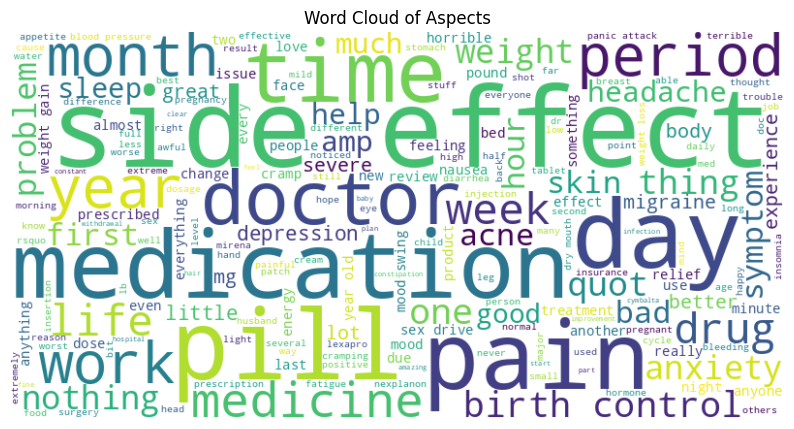

In [ ]:
def plot_wordcloud(df):
    aspects_flat = [aspect for sublist in df['aspects'] for aspect in sublist]
    text = ' '.join(aspects_flat)

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Aspects")
    plt.savefig('wordcloud.svg', format='svg', bbox_inches='tight')

    plt.show()

# Plot word clouds for both datasets
plot_wordcloud(df)

2. count of positive,negative and neutral responses

In [ ]:

# 1. Count of Positive, Negative, and Neutral Responses
def plot_response_count(df):
    response_count = {"positive": 0, "negative": 0, "neutral": 0}

    # Iterate through the aspect sentiments and categorize sentiment as positive, negative, or neutral
    for sentiment_dict in df['aspect_sentiments']:
        for sentiment in sentiment_dict.values():
            if sentiment > 0.05:
                response_count["positive"] += 1
            elif sentiment < -0.05:
                response_count["negative"] += 1
            else:
                response_count["neutral"] += 1

    return response_count

<ipython-input-58-455029694e00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(response_count.keys()), y=list(response_count.values()), palette='coolwarm')


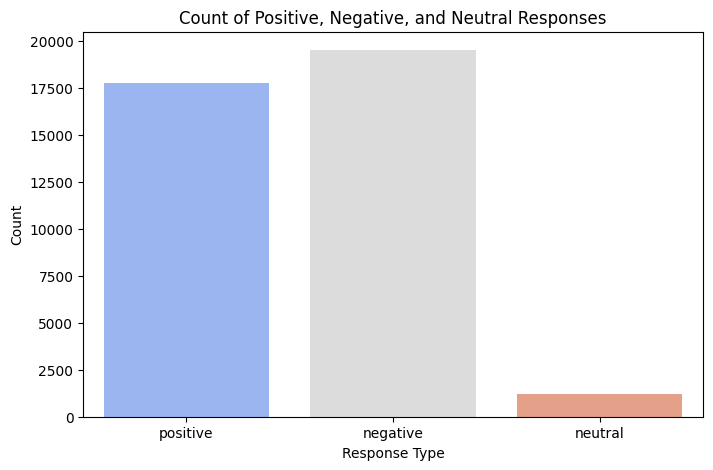

In [ ]:
response_count = plot_response_count(df)
plt.figure(figsize=(8, 5))
sns.barplot(x=list(response_count.keys()), y=list(response_count.values()), palette='coolwarm')
plt.title("Count of Positive, Negative, and Neutral Responses")
plt.xlabel("Response Type")
plt.ylabel("Count")
plt.savefig('response_count.svg', format='svg', bbox_inches='tight')

plt.show()

In [ ]:
def plot_sentiment_per_drug(df):
    sentiment_per_drug = {}

    # Calculate average sentiment for each drug
    for index, row in df.iterrows():
        # Check if 'aspect_sentiments' is empty before calculating average sentiment
        if row['aspect_sentiments']:  # If 'aspect_sentiments' is not empty
            avg_sentiment = sum(row['aspect_sentiments'].values()) / len(row['aspect_sentiments'])
        else:
            avg_sentiment = 0  # or any other default value you prefer for empty sentiments

        drug_name = row['drug_name']

        if drug_name not in sentiment_per_drug:
            sentiment_per_drug[drug_name] = []

        sentiment_per_drug[drug_name].append(avg_sentiment)

    # Calculate the average sentiment across all reviews for each drug
    avg_sentiment_per_drug = {drug: sum(scores)/len(scores) for drug, scores in sentiment_per_drug.items()}

    return avg_sentiment_per_drug

avg_sentiment_per_drug = plot_sentiment_per_drug(df)

<ipython-input-60-78a3d78c57b1>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(drugs), y=list(sentiments), palette='coolwarm')


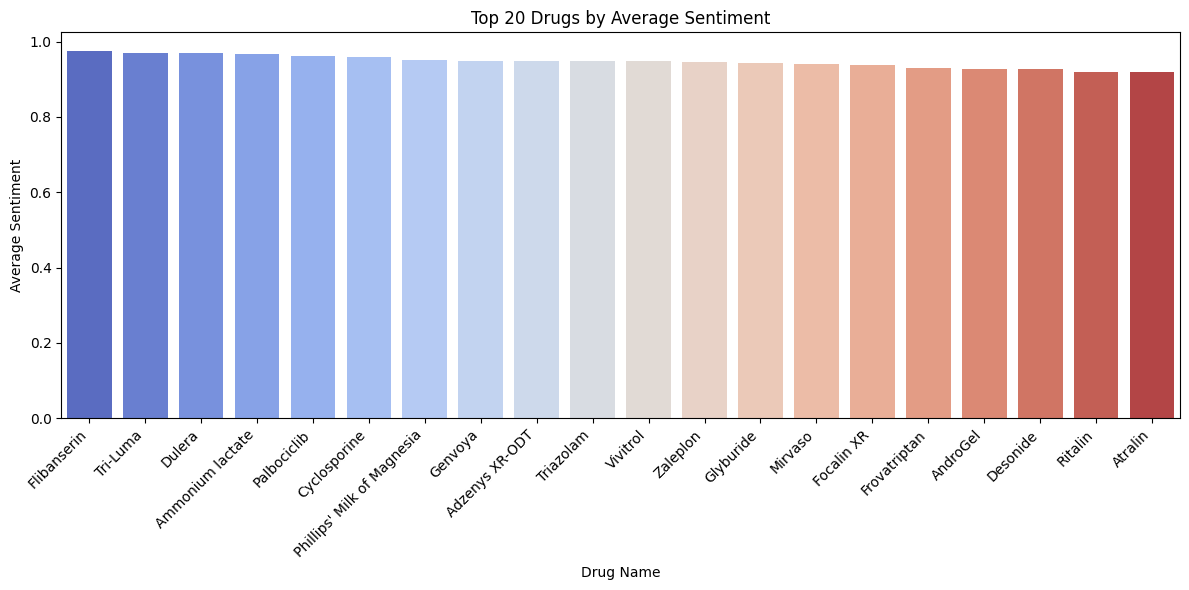

In [ ]:
# 1. Filter the top N drugs by average sentiment
N = 20
top_drugs = sorted(avg_sentiment_per_drug.items(), key=lambda x: x[1], reverse=True)[:N]


drugs, sentiments = zip(*top_drugs)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(drugs), y=list(sentiments), palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title(f"Top {N} Drugs by Average Sentiment")
plt.xlabel("Drug Name")
plt.ylabel("Average Sentiment")
plt.tight_layout()
plt.savefig('top_drugs.svg', format='svg', bbox_inches='tight')
plt.show()

Sentiment Heatmap for Top Aspects

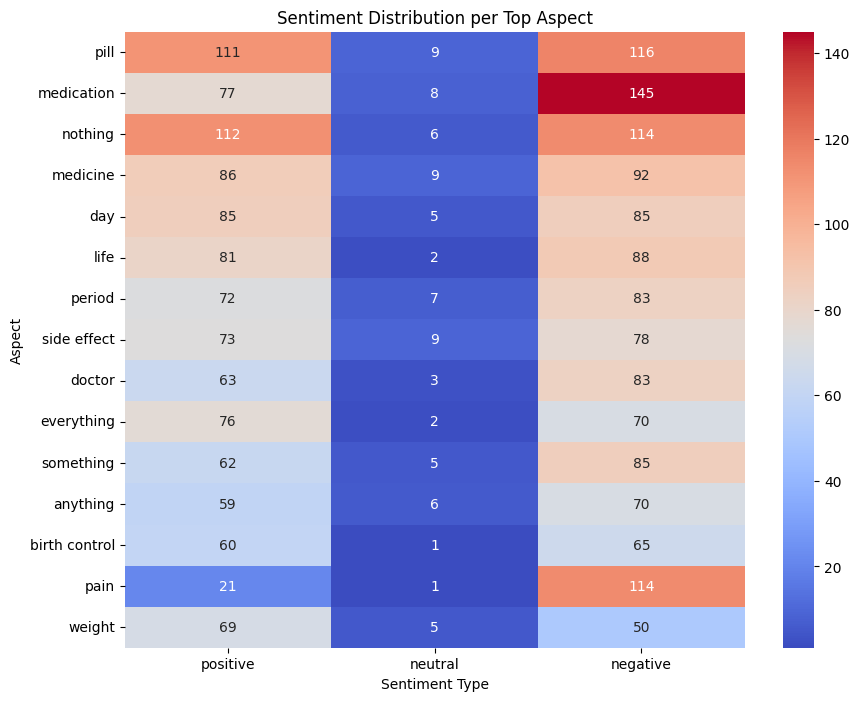

In [ ]:
import pandas as pd
from collections import Counter  # Import Counter from collections

def aspect_sentiment_matrix(df, top_n=15):
    all_aspects = [aspect.lower() for sublist in df['aspects'] for aspect in sublist]
    top_aspects = [aspect for aspect, _ in Counter(all_aspects).most_common(top_n)]

    sentiment_matrix = {aspect: {"positive": 0, "neutral": 0, "negative": 0} for aspect in top_aspects}

    for sentiments in df['aspect_sentiments']:
        for aspect, score in sentiments.items():
            aspect = aspect.lower()
            if aspect in top_aspects:
                if score > 0.05:
                    sentiment_matrix[aspect]["positive"] += 1
                elif score < -0.05:
                    sentiment_matrix[aspect]["negative"] += 1
                else:
                    sentiment_matrix[aspect]["neutral"] += 1

    sentiment_df = pd.DataFrame(sentiment_matrix).T
    return sentiment_df

sentiment_df = aspect_sentiment_matrix(df)

plt.figure(figsize=(10, 8))
sns.heatmap(sentiment_df, annot=True, fmt='d', cmap='coolwarm')
plt.title("Sentiment Distribution per Top Aspect")
plt.ylabel("Aspect")
plt.xlabel("Sentiment Type")
plt.savefig('aspect_heatmap.svg', format='svg', bbox_inches='tight')
plt.show()

Pie Chart of Overall Sentiment Distribution

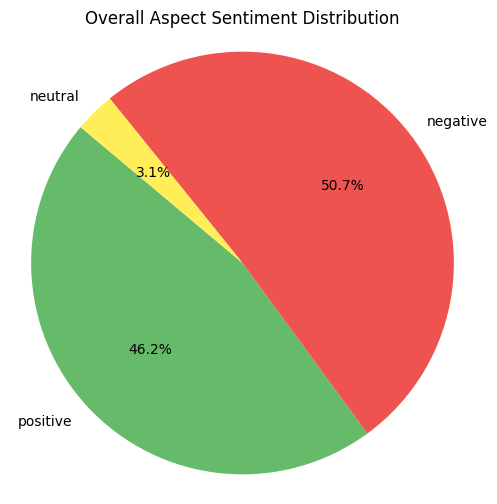

In [ ]:

def plot_sentiment_pie(response_count):
    labels = list(response_count.keys())
    sizes = list(response_count.values())
    colors = ['#66bb6a', '#ef5350', '#ffee58']

    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title("Overall Aspect Sentiment Distribution")
    plt.axis('equal')
    plt.savefig('sentiment_pie.svg', format='svg', bbox_inches='tight')
    plt.show()

plot_sentiment_pie(response_count)

 Radar Chart (Spider Chart) – Drug Sentiment Profile

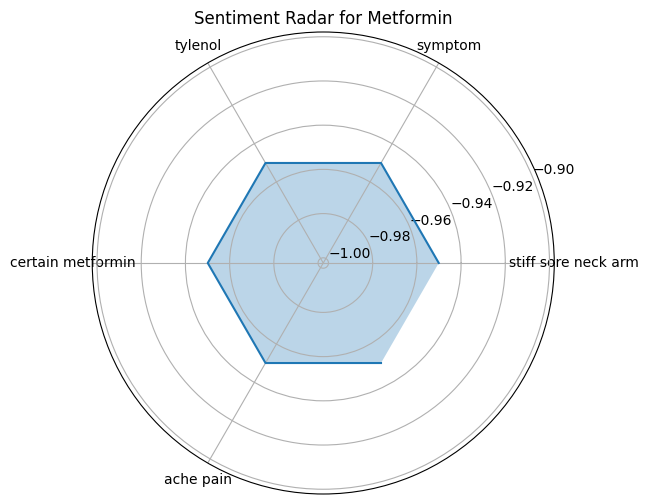

In [ ]:
from math import pi
from collections import defaultdict # Import defaultdict

def plot_radar_chart(drug_name, df):
    aspects_scores = defaultdict(list)

    # Collect aspect sentiments for the selected drug
    for _, row in df[df['drug_name'] == drug_name].iterrows():
        for aspect, score in row['aspect_sentiments'].items():
            aspects_scores[aspect].append(score)

    # Take top 5 aspects and their average scores
    avg_scores = {k: sum(v)/len(v) for k, v in aspects_scores.items()}
    top_aspects = dict(sorted(avg_scores.items(), key=lambda x: -abs(x[1]))[:5])

    labels = list(top_aspects.keys())
    values = list(top_aspects.values())
    values += values[:1]  # Repeat first to close the radar loop
    labels += labels[:1]

    angles = [n / float(len(labels)) * 2 * pi for n in range(len(labels))]

    plt.figure(figsize=(6,6))
    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], labels[:-1])
    ax.plot(angles, values)
    ax.fill(angles, values, alpha=0.3)
    plt.title(f"Sentiment Radar for {drug_name}")
    plt.savefig('radar_chart.svg', format='svg', bbox_inches='tight')
    plt.show()

# Example:
plot_radar_chart('Metformin', df)  # Replace with any drug name in your dataset

 Treemap of Most Mentioned Aspects

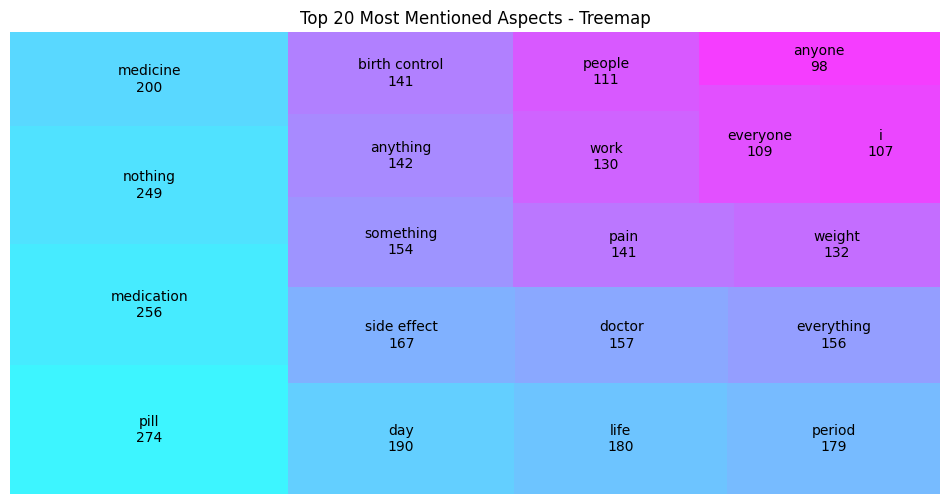

In [ ]:
!pip install squarify # Install the missing squarify library
import squarify # Now import the installed library
from collections import Counter

def plot_aspect_treemap(df):
    all_aspects = [aspect for sublist in df['aspects'] for aspect in sublist]
    aspect_counts = Counter(all_aspects)
    top_aspects = aspect_counts.most_common(20)

    labels = [f"{k}\n{v}" for k, v in top_aspects]
    sizes = [v for _, v in top_aspects]

    plt.figure(figsize=(12, 6))
    squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette('cool', len(sizes)))
    plt.axis('off')
    plt.title("Top 20 Most Mentioned Aspects - Treemap")
    plt.savefig('treemap.svg', format='svg', bbox_inches='tight')
    plt.show()

plot_aspect_treemap(df)

CHATBOT

In [ ]:
!pip install streamlit pandas nltk spacy
!python -m nltk.downloader vader_lexicon
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 125.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.3 MB/s eta 0:00:00
<frozen runpy>:128: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 46.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selectin

In [ ]:
%%writefile chatbot_ui_csv.py
import streamlit as st
import pandas as pd
import ast
import spacy
from nltk.sentiment import SentimentIntensityAnalyzer

# Load backend
CSV_PATH = 'models/processed_reviews.csv'
df = pd.read_csv(CSV_PATH)

# Parse stringified columns
df['aspects'] = df['aspects'].apply(ast.literal_eval)
df['aspect_sentiments'] = df['aspect_sentiments'].apply(ast.literal_eval)

# NLP Models
nlp = spacy.load("en_core_web_sm")
sia = SentimentIntensityAnalyzer()

# Utilities
def extract_keywords(text):
    doc = nlp(text)
    return [chunk.text for chunk in doc.noun_chunks]

def aspect_sentiment(review, aspects):
    sentiment_scores = {}
    for aspect in aspects:
        if aspect in review:
            score = sia.polarity_scores(review)['compound']
            sentiment_scores[aspect] = score
    return sentiment_scores

def generate_reply(aspect_sentiments):
    # Get average sentiment across all aspects
    if not aspect_sentiments:
        return "🤔 Thank you for your feedback."

    avg_sentiment = sum(aspect_sentiments.values()) / len(aspect_sentiments)

    if avg_sentiment > 0.05:
        return "😊 We're glad to hear things are working well for you!"
    elif avg_sentiment < -0.05:
        return "⚠️ We're sorry you're experiencing issues. Could you tell us more?"
    else:
        return "🔍 Thank you for your feedback."


# UI
st.title("💊 Drug Review Chatbot")
st.write("Ask a question or paste a drug review:")

user_input = st.text_area("📝 Your Review", height=150)

if st.button("💬 Generate Auto Reply"):
    cleaned = user_input.strip().lower()

    if cleaned:
        match = df[df['cleaned_review'].str.lower() == cleaned]

        if not match.empty:
            aspects = match.iloc[0]['aspects']
            sentiments = match.iloc[0]['aspect_sentiments']
            reply = match.iloc[0]['auto_reply']
            st.success("✅ Found in database.")
        else:
            aspects = extract_keywords(cleaned)
            sentiments = aspect_sentiment(cleaned, aspects)
            reply = generate_reply(sentiments)
            st.info("⚠️ Not in database. Generated on the fly.")

        st.markdown("#### 🔍 Extracted Aspects")
        st.write(aspects)

        st.markdown("#### 📊 Aspect Sentiments")
        st.write(sentiments)

        st.markdown("#### 🤖 Auto Reply")
        st.success(reply)
    else:
        st.warning("Please enter a review.")

Writing chatbot_ui_csv.py


In [ ]:
!ngrok config add-authtoken 2w2UXxKcmVVFhfW6dF8jY0LvWsz_Vaf8BuYF5CvwRkawB4rC

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!pip install pyngrok
from pyngrok import ngrok

# Kill any tunnels if rerunning
ngrok.kill()

# Connect ngrok to Streamlit
public_url = ngrok.connect(8501)
print(f"🌐 Public URL: {public_url}")

# Launch the chatbot
!streamlit run chatbot_ui_csv.py &

🌐 Public URL: NgrokTunnel: "https://0bd5-34-125-2-68.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.2.68:8501

2025-04-29 07:13:34.838 Examining the path of torch.classes raised:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/bootstrap.py", line 347, in run
    if asyncio.get_running_loop().is_running():
       ^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: no running event loop

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/watcher/local_sources_watcher.py", line 217, in get_module_paths
    potential_paths = extract_paths(module)
                      ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/streamlit/watcher/local_sources_watcher.py", line 2

# New Section

In [ ]:
!apt-get update && apt-get install -y inkscape

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [75.2 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,604 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,842 kB]
Get:13 http://security.ubuntu.com/ubuntu

In [ ]:
!inkscape 'Streamlit.pdf' --export-filename='chatbot.svg' --export-plain-svg --export-area-drawing

Failed to get connection
** (inkscape:22431): CRITICAL **: 13:11:07.862: dbus_g_proxy_new_for_name: assertion 'connection != NULL' failed

** (inkscape:22431): CRITICAL **: 13:11:07.862: dbus_g_proxy_call: assertion 'DBUS_IS_G_PROXY (proxy)' failed

** (inkscape:22431): CRITICAL **: 13:11:07.862: dbus_g_connection_register_g_object: assertion 'connection != NULL' failed


In [ ]:
# Install pdf2svg (lightweight and headless)
!apt-get install -y pdf2svg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  pdf2svg
0 upgraded, 1 newly installed, 0 to remove and 41 not upgraded.
Need to get 6,888 B of archives.
After this operation, 29.7 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 pdf2svg amd64 0.2.3-2 [6,888 B]
Fetched 6,888 B in 1s (12.1 kB/s)
Selecting previously unselected package pdf2svg.
(Reading database ... 133611 files and directories currently installed.)
Preparing to unpack .../pdf2svg_0.2.3-2_amd64.deb ...
Unpacking pdf2svg (0.2.3-2) ...
Setting up pdf2svg (0.2.3-2) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
# Replace the filename with your actual PDF name
!pdf2svg Streamlit.pdf chatbot.svg 1
!pdf2svg Streamlit.pdf chatbot.svg 2

*** BUG ***
In pixman_region32_init_rect: Invalid rectangle passed
Set a breakpoint on '_pixman_log_error' to debug

*** BUG ***
In pixman_region32_init_rect: Invalid rectangle passed
Set a breakpoint on '_pixman_log_error' to debug

*** BUG ***
In pixman_region32_init_rect: Invalid rectangle passed
Set a breakpoint on '_pixman_log_error' to debug

*** BUG ***
In pixman_region32_init_rect: Invalid rectangle passed
Set a breakpoint on '_pixman_log_error' to debug

*** BUG ***
In pixman_region32_init_rect: Invalid rectangle passed
Set a breakpoint on '_pixman_log_error' to debug

